# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
**Brief Introduction**
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

****Columns****

>**Budget**: Budget of the movie

>**Genres**: Genre type of the movie

>**Homepage**: Link for the movie

>**ID**: ID for each movie on the dataset

>**Imdb ID**: Imdb for each movie on the dataset

>**Keywords**: Keywords for each movie

>**Original Title**: Title of the movie

>**Overview**: Overview of the movie

>**Popularity**: Popularity Percentage(Significant)

>**Production Companies**: Companies that produced the movie

>**Release Date**: Release date of the movie

>**Release year**: Release year of the movie

>**Revenue**: How much is the revenue of the movie (Significant)

>**Runtime**: Duration of the movie (Significant)

>**Tagline**: Tagline of the movie

>**Vote Average**: Average of votes for the movie(1-->10)

>**Vote Count**: Count of votes for the movie

>**Cast**: Cast of the movie

>**Director**: Director of the movie

>**Budget adjusted**: Budget in terms of 2010 dollars, accounting for inflation over time.

>**Revenue adjusted**: Revenue in terms of 2010 dollars, accounting for inflation over time. 


### Question(s) for Analysis

>**Question one**:Which genres are most popular from year to year?

>**Question two**:What kinds of properties are associated with movies that have high revenues?

>**Question three**:Who is the Director who contibute in the highest profit each year?

>**Question four**: Compare factors affecting success of movies for the same company

>**Question five**: How title, keywords and runtime affect popularity?

>**Question six**: Which company whose likely get the most votes for production each year?

>**Question seven**: Actors who affected highest revenues each year?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.6.3.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.15.0-1083-gcp
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 0.25.0
numpy            : 1.19.5
pytz             : 2017.3
dateutil         : 2.6.1
pip              : 18.1
setuptools       : 38.4.0
Cython           : 0.29.7
pytest           : 4.5.0
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.1.1
html5lib         : 0.9999999
pymysql          : None
psycopg2         : 2.7.4 (dt dec pq3 ext lo64)
jinja2           : 2.10
IPython          : 6.5.0
pandas_datareader: None
bs4              : 4.6.0
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.1.1
matplo

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.4MB/s eta 0:00:01  4% |█▋                              | 512kB 14.6MB/s eta 0:00:01    32% |██████████▎                     | 3.3MB 30.3MB/s eta 0:00:01    59% |███████████████████             | 6.2MB 30.2MB/s eta 0:00:01    99% |███████████████████████████████▊| 10.4MB 28.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   24% |███████▊                        | 3.2MB 27.8MB/s eta 0:00:01    34% |███████████                     | 4.6MB 30.2MB/s eta 0:00:01    74% |███████████████████████▊        | 9.9MB 28.5MB/s eta 0:00:01    83% |██████████████████████████▉     | 11.2MB 26.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unins

### Functions

In [14]:
## Function to split data in rows 
def split_columns(data_frame, column, character):
        """A function that Splits values of a column and expand it to new rows
           data_frame: pandas
               Data needed to be split
           column: str
               column needed to be split and expand
           character: str
               Character that split the sentence
           return data_frame: pandas dataframe
               Splitted dataframe
        """
        data_frame[column] = data_frame[column].apply(lambda x: x.split(character))
        data_frame = data_frame.explode(column)
        return data_frame

In [15]:
##Function to plot data
def plot_data(figsize, df, kind, title, xlabel, ylabel):
    """A function that plot data
           figsize: tuple(x_axis, y_axis)
               size of figure
           df: pandas
               Data needed to be plotted
           kind: str
               kind of plot
           title: str
               title of figure
           xlabel: str
               label of x_axis
           ylabel: str
               label of y_axis
        """
    fig, ax = plt.subplots(figsize=figsize)
    df.plot(kind=kind,ax=ax)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [16]:
##Function to plot data with x_axis and y_axis known
def plot_data_height(figsize, x, height, title, xlabel, ylabel):
    """A function that plot data with height
           figsize: tuple(x_axis, y_axis)
               size of figure
           x: column
               x_axis
           height: column
               y_axis
           title: str
               title of figure
           xlabel: str
               label of x_axis
           ylabel: str
               label of y_axis
        """
    plt.subplots(figsize = figsize)
    plt.bar(x = x, height = height)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

<a id='wrangling'></a>
## Data Wrangling

### General Properties

**Reading Data**

In [17]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [19]:
df.shape

(10866, 21)


### Data Cleaning
 

**Dropping**
>*imdb_id*: we already have another unique ID

>*budget*: we already have budget adjusted according to inflation which makes more sense

>*revenue*: we already have revenue adjusted

>*homepage*: not necessary for analysis

>*release date*: we already have release year for analysis

>*vote_count*: we already have vote average for analysis**

>*tagline* : we already have keywords

>*overview* : we already have keywords

In [20]:
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'release_date','vote_count', 'tagline', 'overview'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


In [22]:
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Filling missing data with None or its mean**

In [23]:
for c in ['cast', 'director', 'keywords', 'genres', 'production_companies']:
    df[c].fillna('None', inplace = True)
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

**Find Duplicate rows and drop them**

In [24]:
df.duplicated().sum(), df.shape

(1, (10866, 13))

In [25]:
df.drop_duplicates(inplace = True)
df.duplicated().sum(), df.shape

(0, (10865, 13))

**Delete Runtime Column smaller than 5 minutes**

In [35]:
df_copy_runtime = df.copy()
df_copy_runtime = df_copy_runtime[(df_copy_runtime[['runtime']] > 5).all(axis=1)]
df_copy_runtime

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08


**Adding new Column profit for q4**


In [26]:
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09



### Data Splitting
 

**Splitting each genre in a separate row**

In [28]:
df_genres = split_columns(df.copy(), 'genres', '|')
df_genres

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


**Split Director**

In [29]:
df_director = split_columns(df.copy(), 'director', '|')
df_director

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08


**Split production companies**

In [32]:
df_pd_companies= split_columns(df.copy(), 'production_companies', '|')
df_pd_companies

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Dentsu,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Kennedy Miller Productions,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Mandeville Films,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Red Wagon Entertainment,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


**Split Cast for Q7**

In [36]:
df_cast = split_columns(df.copy(), 'cast', '|')
df_cast

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Irrfan Khan,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Nick Robinson,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Charlize Theron,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Hugh Keays-Byrne,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Nicholas Hoult,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Josh Helman,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


**Drop duplicates After splitting columns of companies for Q4**

In [33]:
df_pd_companies.drop_duplicates(inplace = True)
df_pd_companies.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Dentsu,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


<a id='eda'></a>
## Exploratory Data Analysis

## Question one : Which Genres are most popular from year to year

**Finding max and minimum of the years incase of wrong dates**

In [37]:
df['release_year'].max(), df['release_year'].min()

(2015, 1960)

**Genre that has maximum popularity per year**

In [38]:
df_popularity_genres = df_genres.groupby(['release_year', 'genres'])['genres','popularity'].max().sort_values(['release_year','popularity'],ascending=False)
df_popularity_genres

popularity
release_year genres                     
2015         Action            32.985763
             Adventure         32.985763
             Science Fiction   32.985763
             Thriller          32.985763
             Fantasy           11.173104
...                                  ...
1960         Family             0.465879
             Crime              0.423531
             Music              0.423531
             War                0.256779
             Foreign            0.194948

[1064 rows x 1 columns]

**Most Popular geners among all years**

In [39]:
df_genres.sort_values('popularity', ascending = False)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
629,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,8.0,2014,1.519800e+08,5.726906e+08,4.207106e+08
629,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Drama,Paramount Pictures|Legendary Pictures|Warner B...,8.0,2014,1.519800e+08,5.726906e+08,4.207106e+08


In [40]:
all_genres = df_genres['genres'].unique()
all_genres

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'None', 'Foreign'], dtype=object)

In [41]:
df_genres[df_genres.genres == all_genres[0]].release_year.max()

2015

**Number of each produced Genre each year**

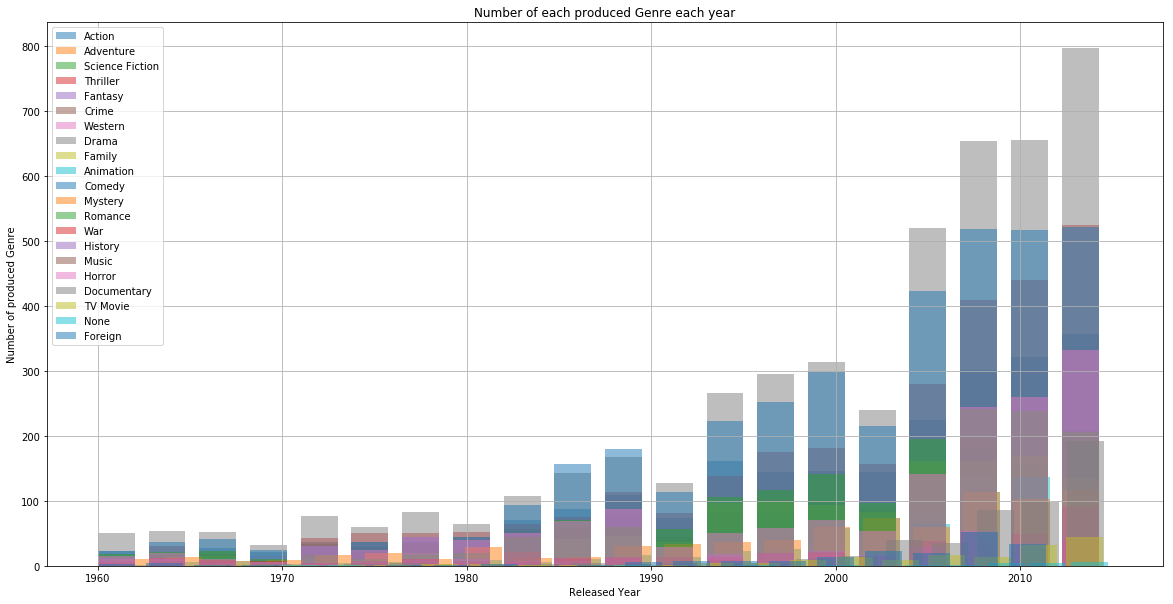

In [43]:
for genre in all_genres:
    df_genres[df_genres.genres == genre].release_year.hist(alpha = 0.5, width = 2, label = genre, figsize = (20, 10), bins = 20)
plt.title('Number of each produced Genre each year')
plt.ylabel('Number of produced Genre')
plt.xlabel('Released Year');
plt.legend();

## Question two:What kinds of properties are associated with movies that have high revenues?

**Trying all expected properties to keep the highest revenue and elimnate the others**

In [44]:
df_copy = df_genres.copy()
df_copy.sort_values('revenue_adj', ascending = False)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Fantasy,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Action,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
5231,597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
5231,597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Thriller,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
5231,597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Romance,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09


In [45]:
df_plot = df_copy.groupby('genres')['revenue_adj'].max()
df_plot

genres
Action             2.827124e+09
Adventure          2.827124e+09
Animation          1.574815e+09
Comedy             1.574815e+09
Crime              1.583050e+09
Documentary        1.375112e+08
Drama              2.506406e+09
Family             1.791694e+09
Fantasy            2.827124e+09
Foreign            7.697178e+07
History            6.445564e+08
Horror             2.167325e+09
Music              1.129535e+09
Mystery            1.583050e+09
None               0.000000e+00
Romance            2.506406e+09
Science Fiction    2.827124e+09
TV Movie           5.838910e+07
Thriller           2.506406e+09
War                7.731786e+08
Western            7.079615e+08
Name: revenue_adj, dtype: float64

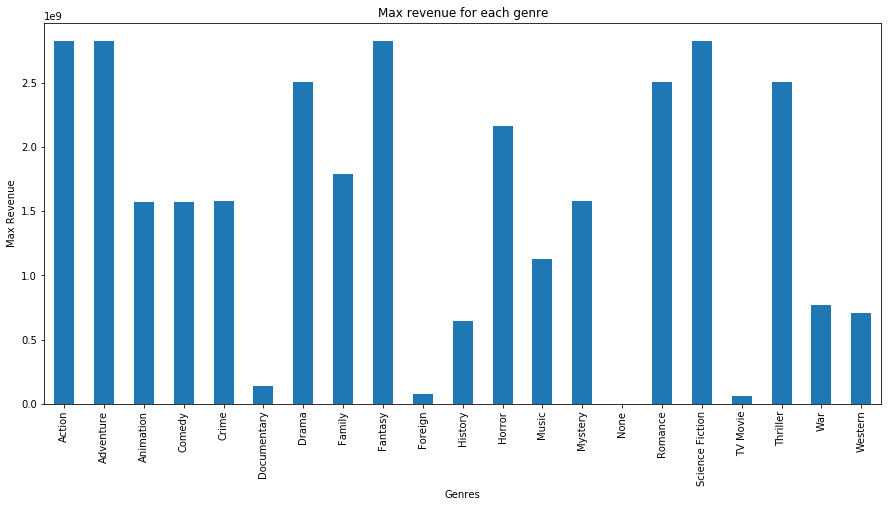

In [46]:
plot_data((15,7), df_plot, 'bar', 'Max revenue for each genre', 'Genres', 'Max Revenue')

In [47]:
df_plot = df_copy.groupby('vote_average').revenue_adj.max().sort_values(ascending = False)
df_plot

vote_average
7.1    2.827124e+09
7.9    2.789712e+09
7.3    2.506406e+09
7.2    2.167325e+09
7.5    1.902723e+09
           ...     
8.5    0.000000e+00
8.6    0.000000e+00
8.7    0.000000e+00
8.8    0.000000e+00
1.5    0.000000e+00
Name: revenue_adj, Length: 72, dtype: float64

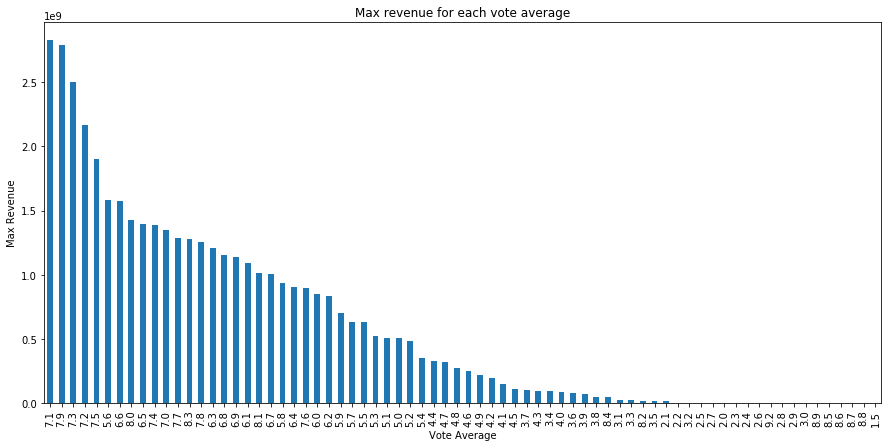

In [48]:
plot_data((15,7), df_plot, 'bar', 'Max revenue for each vote average', 'Vote Average', 'Max Revenue')

In [49]:
df_copy.groupby(['vote_average','genres'])['genres','revenue_adj'].max().sort_values('revenue_adj',ascending = False)

revenue_adj
vote_average genres                       
7.1          Science Fiction  2.827124e+09
             Fantasy          2.827124e+09
             Adventure        2.827124e+09
             Action           2.827124e+09
7.9          Adventure        2.789712e+09
...                                    ...
4.4          War              0.000000e+00
             Foreign          0.000000e+00
             Animation        0.000000e+00
4.3          Western          0.000000e+00
9.2          Documentary      0.000000e+00

[1022 rows x 1 columns]

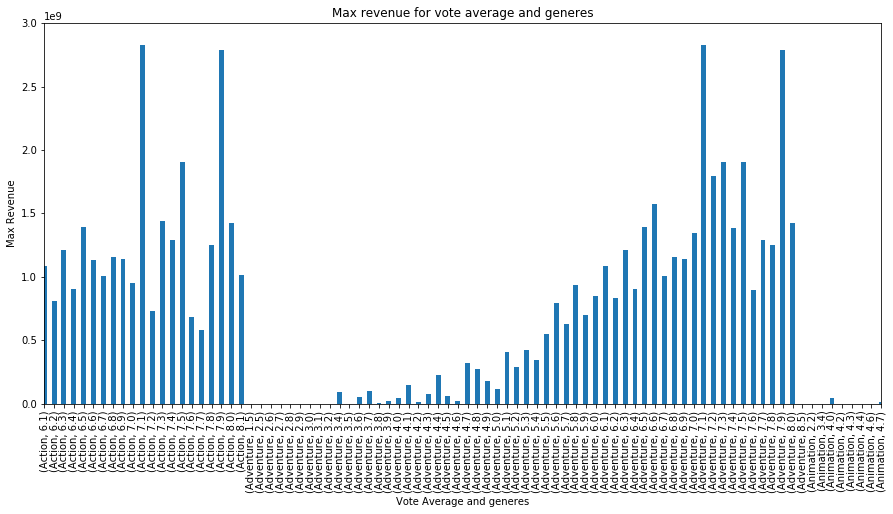

In [50]:
df_plot = df_copy.groupby(['genres','vote_average'])['revenue_adj'].max()
plot_data((15,7), df_plot, 'bar', 'Max revenue for vote average and generes', 'Vote Average and generes', 'Max Revenue')
plt.axis([40, 125, 0, 3.0e+9]);

## Question three:Who is the Director who contibutes in the highest profit each year?

In [51]:
df_director.groupby(['release_year', 'director'])['director','profit'].max().sort_values(['release_year','profit'],ascending=False)

profit
release_year director                     
2015         J.J. Abrams      1.718723e+09
             Colin Trevorrow  1.254446e+09
             James Wan        1.210949e+09
             Joss Whedon      1.035032e+09
             Kyle Balda       9.961120e+08
...                                    ...
1960         Terence Fisher   0.000000e+00
             William Castle   0.000000e+00
             Roger Corman    -2.211890e+05
             Wolf Rilla      -1.474593e+06
             George Pal      -5.529726e+06

[11523 rows x 1 columns]

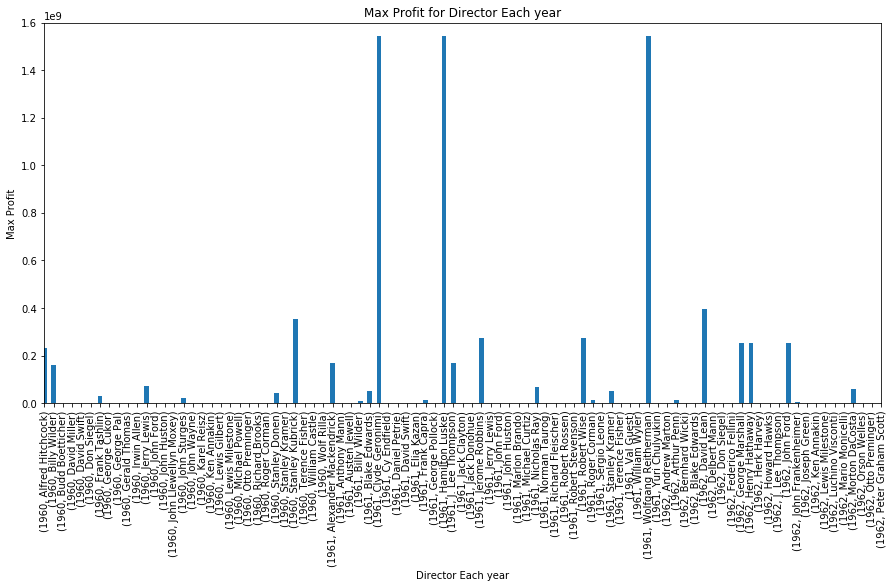

In [52]:
df_plot = df_director.groupby(['release_year', 'director'])['profit'].max()
plot_data((15,7), df_plot, 'bar', 'Max Profit for Director Each year', 'Director Each year', 'Max Profit')
plt.axis([0, 90, 0, 1.6e+9]);

## Question four: Compare factors affecting success of movies for the same company

**Get duplicated Companies only and sort them**

In [53]:
duplicated_companies = df_pd_companies[df_pd_companies.duplicated(['production_companies'])].sort_values('production_companies')
duplicated_companies.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
4744,72890,0.221973,Girl Most Likely,Kristen Wiig|Annette Bening|Matt Dillon|Darren...,Shari Springer Berman|Robert Pulcini,woman director,103,Comedy,10th Hole Productions,5.7,2012,0.000000e+00,0.000000,0.000000e+00
5837,127373,0.230595,What Maisie Knew,Alexander SkarsgÃ¥rd|Julianne Moore|Steve Coog...,Scott McGehee|David Siegel,None,93,Drama,10th Hole Productions,7.5,2013,5.616200e+06,998252.425730,-4.617948e+06
2283,41556,0.385851,The Romantics,Katie Holmes|Anna Paquin|Josh Duhamel|Dianna A...,Galt Niederhoffer,cheating|wedding|romantic literature|woman dir...,95,Comedy|Drama|Romance,10th Hole Productions,4.8,2010,4.500000e+06,123820.000000,-4.376180e+06
5702,199420,0.396210,Pawn Shop Chronicles,Elijah Wood|Norman Reedus|Brendan Fraser|Vince...,Wayne Kramer,None,112,Action|Comedy,120dB Films,5.6,2013,4.680167e+06,0.000000,-4.680167e+06
3581,59296,0.520430,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,wedding vows|marriage|love,90,Comedy|Romance,120dB Films,5.3,2011,9.693980e-01,1335.830503,1.334861e+03


**Get first two duplicate companies with highest vote**

In [54]:
unique_duplicates = duplicated_companies['production_companies'].unique()
print(unique_duplicates)
company_compare = duplicated_companies.query('production_companies == "{0}"'.format(unique_duplicates[0])).nlargest(2, ['vote_average'])
company_compare

['10th Hole Productions' '120dB Films' '1492 Pictures' ...
 'nu image films' 'platinum studios' 'uFilm']


,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
5837,127373,0.230595,What Maisie Knew,Alexander SkarsgÃ¥rd|Julianne Moore|Steve Coog...,Scott McGehee|David Siegel,None,93,Drama,10th Hole Productions,7.5,2013,5.616200e+06,998252.42573,-4.617948e+06
4744,72890,0.221973,Girl Most Likely,Kristen Wiig|Annette Bening|Matt Dillon|Darren...,Shari Springer Berman|Robert Pulcini,woman director,103,Comedy,10th Hole Productions,5.7,2012,0.000000e+00,0.00000,0.000000e+00


**Pick first duplicate company to compare genres with popularity**

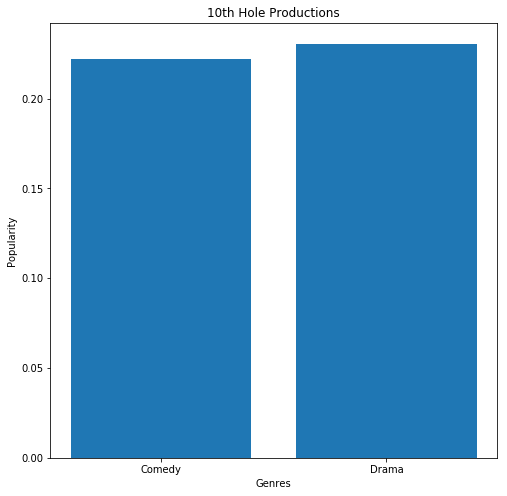

In [55]:
plot_data_height((8, 8), company_compare['genres'], company_compare['popularity'], unique_duplicates[0], 'Genres', 'Popularity')

**Get first two duplicate companies with highest vote**

In [56]:
company_compare = duplicated_companies.query('production_companies == "{0}"'.format(unique_duplicates[1])).nlargest(2, ['vote_average'])
company_compare

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
5837,127373,0.230595,What Maisie Knew,Alexander SkarsgÃ¥rd|Julianne Moore|Steve Coog...,Scott McGehee|David Siegel,None,93,Drama,120dB Films,7.5,2013,5.616200e+06,998252.42573,-4.617948e+06
5702,199420,0.396210,Pawn Shop Chronicles,Elijah Wood|Norman Reedus|Brendan Fraser|Vince...,Wayne Kramer,None,112,Action|Comedy,120dB Films,5.6,2013,4.680167e+06,0.00000,-4.680167e+06


**Pick second duplicate company to compare title with popularity**

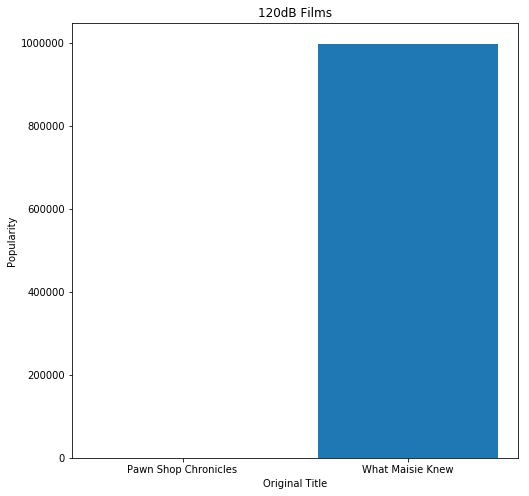

In [57]:
plot_data_height((8, 8), company_compare['original_title'], company_compare['revenue_adj'], unique_duplicates[1], 'Original Title', 'Popularity')

**Get first two duplicate companies with highest vote**

In [58]:
company_compare = duplicated_companies.query('production_companies == "{0}"'.format(unique_duplicates[2])).nlargest(2, ['vote_average'])
company_compare

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
3455,50014,1.105855,The Help,Emma Stone|Viola Davis|Octavia Spencer|Bryce D...,Tate Taylor,mississippi|based on novel|exploitation|racial...,146,Drama,1492 Pictures,7.6,2011,2.423495e+07,1.204692e+08,9.623420e+07
6962,673,5.827781,Harry Potter and the Prisoner of Azkaban,Daniel Radcliffe|Rupert Grint|Emma Watson|Gary...,Alfonso CuarÃ³n,flying|traitor|cutting the cord|child hero|broom,141,Adventure|Fantasy|Family,1492 Pictures,7.4,2004,1.500779e+08,9.117862e+08,7.617083e+08


**Pick third duplicate company to compare title with profit**

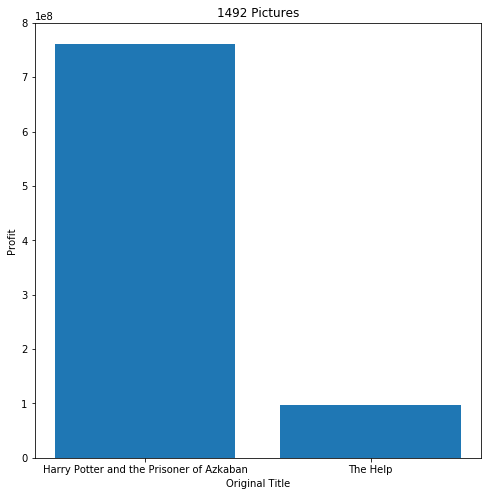

In [59]:
plot_data_height((8, 8), company_compare['original_title'], company_compare['profit'], unique_duplicates[2], 'Original Title', 'Profit')

## Question five: How title, keywords and runtime affect popularity?

In [60]:
df_copy_runtime.groupby(['runtime', 'keywords', 'original_title'])['original_title', 'popularity'].mean().sort_values('popularity', ascending = False)

,,,popularity
runtime,keywords,original_title,
124,monster|dna|tyrannosaurus rex|velociraptor|island,Jurassic World,32.985763
120,future|chase|post-apocalyptic|dystopia|australia,Mad Max: Fury Road,28.419936
169,saving the world|artificial intelligence|father-son relationship|single parent|nasa,Interstellar,24.949134
121,marvel comic|spaceship|space|scene during end credits|outer space,Guardians of the Galaxy,14.311205
119,based on novel|revolution|dystopia|sequel|dystopic future,Insurgent,13.112507
136,washington d.c.|future|shield|marvel comic|comic,Captain America: The Winter Soldier,12.971027
121,android|galaxy|hermit|death star|lightsaber,Star Wars,12.037933
101,hitman|revenge|murder|gangster|dog,John Wick,11.422751
136,android|spaceship|jedi|space opera|3d,Star Wars: The Force Awakens,11.173104


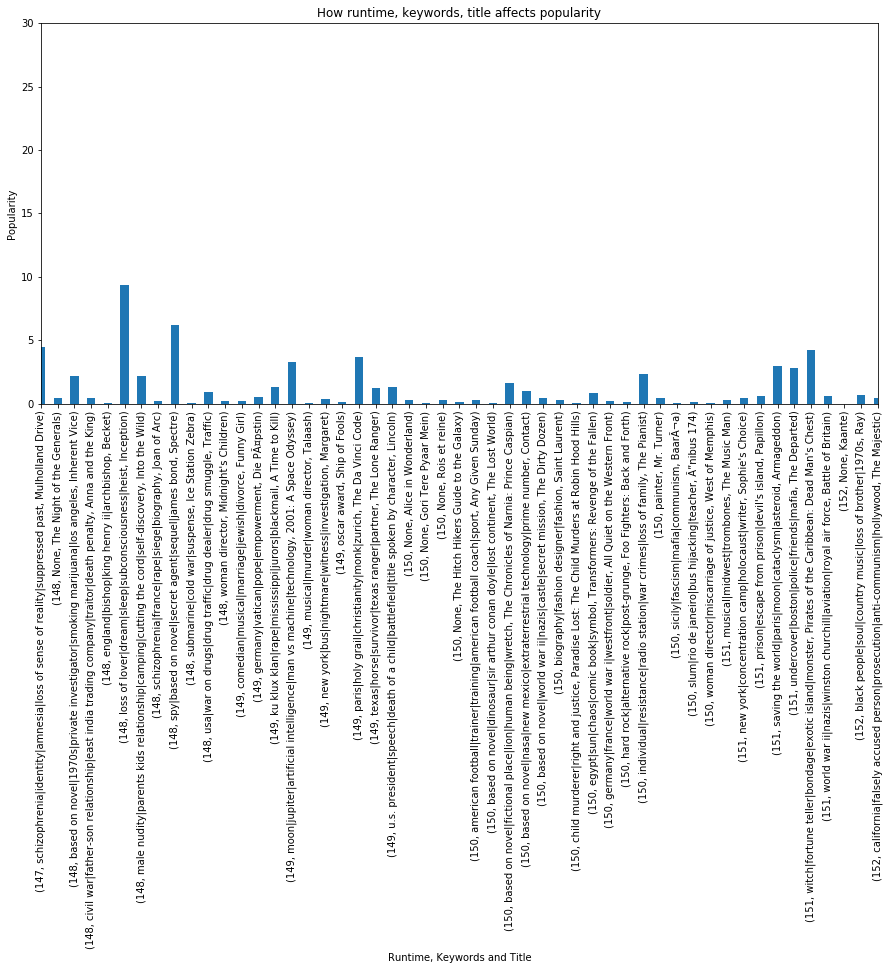

In [61]:
df_plot = df_copy_runtime.groupby(['runtime', 'keywords', 'original_title'])['popularity'].mean()
plot_data((15,7), df_plot, 'bar', 'How runtime, keywords, title affects popularity', 'Runtime, Keywords and Title', 'Popularity')
plt.axis([10400, 10450, 0, 30]);

## Question six: Which company whose likely get the most votes for production each year?

In [62]:
df_pd_companies.groupby(['release_year','production_companies'])['production_companies','vote_average'].mean().sort_values(['release_year', 'vote_average'], ascending = False)

vote_average
release_year production_companies                                
2015         Hit the Ground Running Films                   8.400
             Afineevsky - Tolmor Production                 8.200
             Bitter Films                                   8.200
             Pray for Ukraine Production                    8.200
             Rock Paper Scissors                            8.200
...                                                           ...
1960         Twentieth Century Fox Film Corporation         5.425
             John Ford Productions                          5.200
             Grandon Productions                            4.900
             James Productions                              4.900
             The Company of Artists                         4.900

[15789 rows x 1 columns]

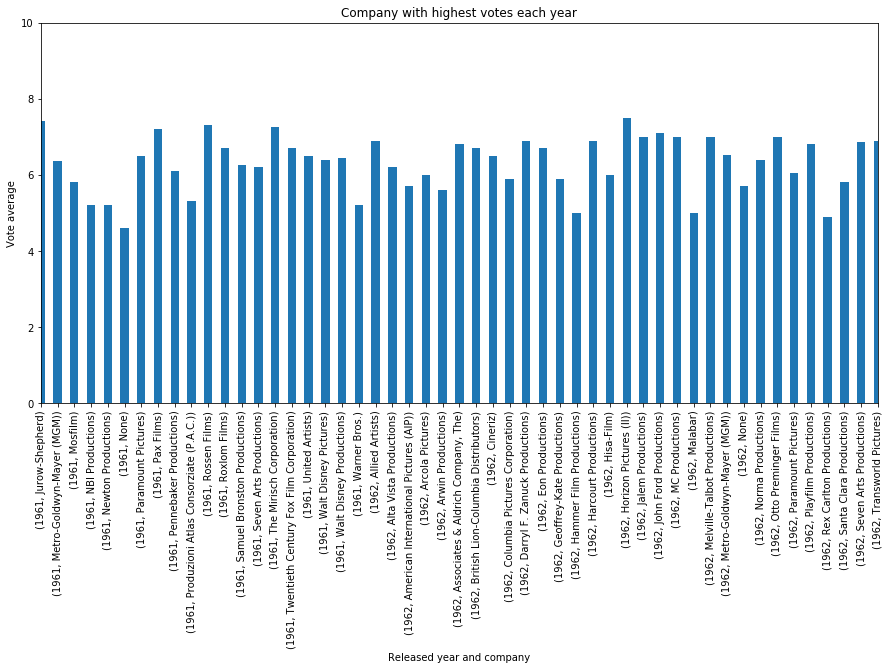

In [63]:
df_plot = df_pd_companies.groupby(['release_year','production_companies']).vote_average.mean()
plot_data((15,7), df_plot, 'bar', 'Company with highest votes each year', 'Released year and company', 'Vote average')
plt.axis([50, 100, 0, 10]);

## Question seven: Actors who affected highest profit each year?

In [64]:
df_cast.groupby(['release_year', 'cast'])['cast', 'profit'].mean().sort_values(['release_year',"profit"], ascending = False)

profit
release_year cast                             
2015         Carrie Fisher        1.718723e+09
             Daisy Ridley         1.718723e+09
             Bryce Dallas Howard  1.254446e+09
             Chris Pratt          1.254446e+09
             Irrfan Khan          1.254446e+09
...                                        ...
1960         Alan Young          -5.529726e+06
             Rod Taylor          -5.529726e+06
             Sebastian Cabot     -5.529726e+06
             Tom Helmore         -5.529726e+06
             Yvette Mimieux      -5.529726e+06

[44432 rows x 1 columns]

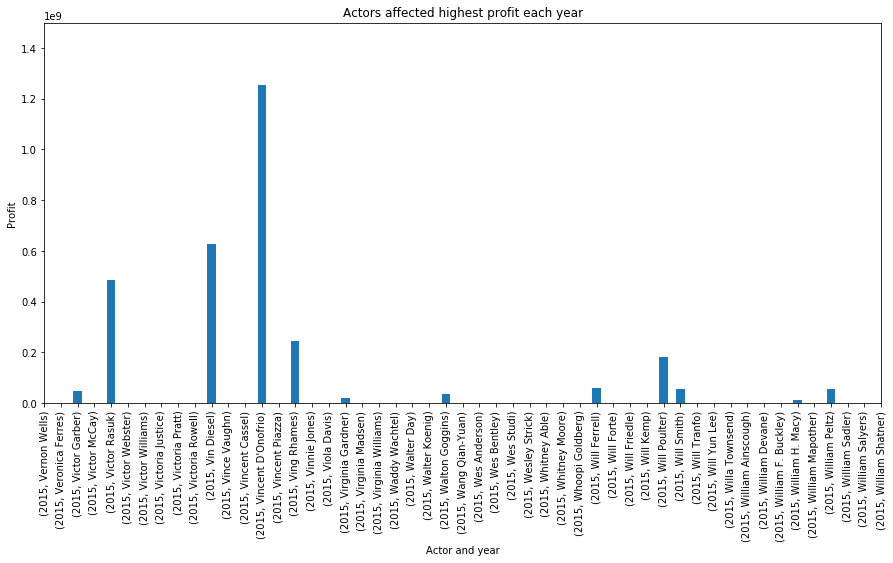

In [65]:
df_plot = df_cast.groupby(['release_year', 'cast'])['profit'].mean()
plot_data((15,7), df_plot, 'bar', 'Actors affected highest profit each year', 'Actor and year', 'Profit')
plt.axis([44350, 44400, 0, 1.5e+9]);

<a id='conclusions'></a>
## Conclusions

>**Question 1 findings: which Genres are most popular from year to year?**

>*2015* : Action

>*2014* : Adventure

>*1961* : Family

>*1960* : Drama

>**Most Popular genre among all years**

>*Action, Adventure, Science Fiction Thriller*

>**Most genre produced each year**

>*Documentary and Action for most of the years*

> **Question 2 findings: What kinds of properties are associated with movies that have high revenues?**

> *Vote average and genres after plotting each property and eliminating those who has not contributed in high revenues*

>*Action: 7.1*


>**Question 3 findings: Who is the Director who contibutes in the highest profit each year?**

>*2015*: J.J. Abrams

>*1960*: Alfred Hitchcock

>**Question 4 findings**: Compare factors affecting success of movies for the same company

>**Company having high votes**

>*10th Hole Productions* : Drama is popular than Comedy

>*120dB Films*: 'What Maisie Knew' movie is popular than 'Pawn Shop Chronicles' movie

>*1492 Pictures*: 'Harry Potter and the Prisoner of Azkaban' movie has more profit than 'The Help' movie

>**Question 5 findings: How title, keywords and runtime affect popularity?**

>**Jurassic World**

> *Keywords = monster|dna|tyrannosaurus rex|velociraptor|island*
 
> *Run time = 124 minutes*

>**Inception**

>*Keywords = loss of lover|dream|sleep|subconsciousness|heist*

>*Run time = 148*

>**Question 6 findings: Which company whose likely get the most votes for production each year?**

>*2015 : Hit the Ground Running Films*

>*1960 : Alpha Productions*

>*1962: Horizon pictures(||)*

>**Question 7: Actors who affected highest profit each year?**

>*2015 : Vincent D'Onofrio, Daisy Ridley and Carrie Fisher has affected the highest profit*


**Additional Questions**

 The most expensive Directors and actors, worth paying for or not next time
 
**Reguired info**

Salary for each Actor and Director

### Limitations

> **Issue 1**: Keywords has null values

> **Issue 2**: Cast has null values

> **Issue 3**: Runtime has null values

> **Issue 4**: Production companies has null values

> **Issue 5**: Genres has null values

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0